In [1]:
import pandas as pd
cases = pd.read_csv('src/cases.csv',sep=';')
cases['Номер поручения']=cases['\ufeffНомер поручения']
marks = pd.read_csv('src/marks.csv',sep=';')
diaries = pd.read_csv('src/diaries.csv',sep=';')

In [52]:
diaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Номер поручения    888 non-null    int64 
 1   Герой              888 non-null    object
 2   Запись в дневнике  888 non-null    object
 3   Затрачено часов    888 non-null    object
 4   Роль               888 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.8+ KB


In [2]:
# Переведём в числовой формат время выполнения задачи
diaries["Затрачено часов"] = diaries["Затрачено часов"].replace({r'[,]': '.'}, regex=True)
diaries['Затрачено часов']=diaries['Затрачено часов'].astype(float)

### Уникальные значения для ролей, героев и записей в дневниках

In [2]:
diaries['Роль'].unique()

array(['рейнджер', 'следопыт', 'лекарь', 'лучник', 'мечник', 'боевой маг'],
      dtype=object)

In [3]:
diaries['Запись в дневнике'].unique()

array(['разжечь костёр', 'выследить цель', 'залечить раны',
       'найти пропажу', 'отыскать заказчика'], dtype=object)

In [4]:
diaries['Герой'].unique()

array(['Мартин', 'Альфред', 'Юлия', 'Агата', 'Фредерик', 'Соня',
       'Пастушок', 'Леопольд', 'Бендер', 'Глюкоза', 'Бенедикт',
       'Синеглазый'], dtype=object)

In [80]:
diaries[(diaries["Запись в дневнике"] == "разжечь костёр") &  (diaries["Герой"] == "Альфред")]


,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль,Выполнено
2,11001,Альфред,разжечь костёр,1,рейнджер,да
55,11041,Альфред,разжечь костёр,1,рейнджер,да
126,11111,Альфред,разжечь костёр,1,рейнджер,да
235,11195,Альфред,разжечь костёр,1,рейнджер,да
242,11200,Альфред,разжечь костёр,1,рейнджер,да
272,11220,Альфред,разжечь костёр,1,рейнджер,да
294,11237,Альфред,разжечь костёр,1,рейнджер,да
317,11257,Альфред,разжечь костёр,1,рейнджер,да
457,11371,Альфред,разжечь костёр,1,рейнджер,да
506,11418,Альфред,разжечь костёр,1,рейнджер,да


### Характеристики героев по ролям и записям в дневнике, кто в какой роли чаще

In [ ]:
# Радарная диаграмма для записей в дневнике для каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = [action for action in diaries['Запись в дневнике'].unique() if action != 'разжечь костёр']

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[(diaries['Герой'] == hero) & (diaries['Запись в дневнике'] != 'разжечь костёр')]['Запись в дневнике'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Запись в дневнике для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_radar(hero)


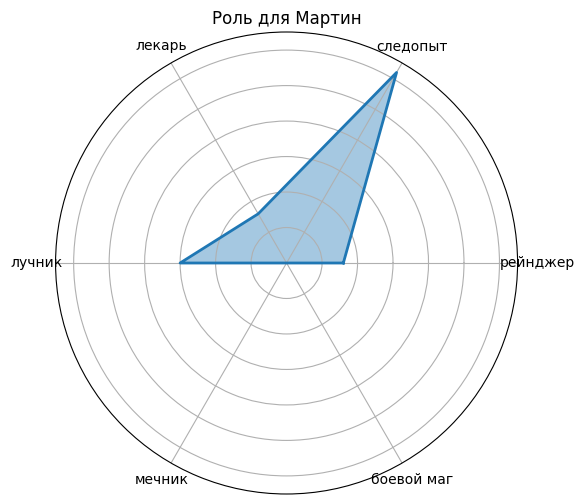

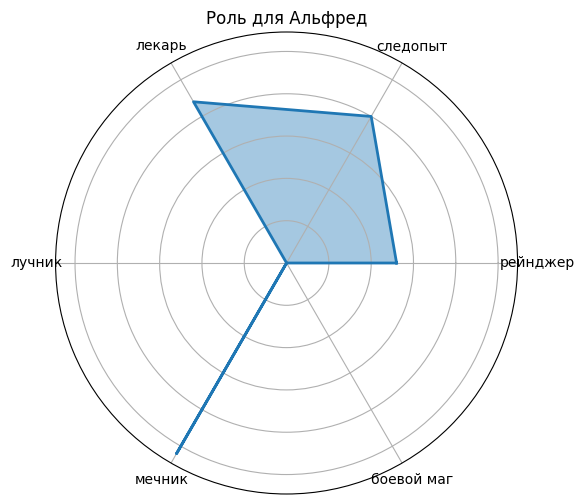

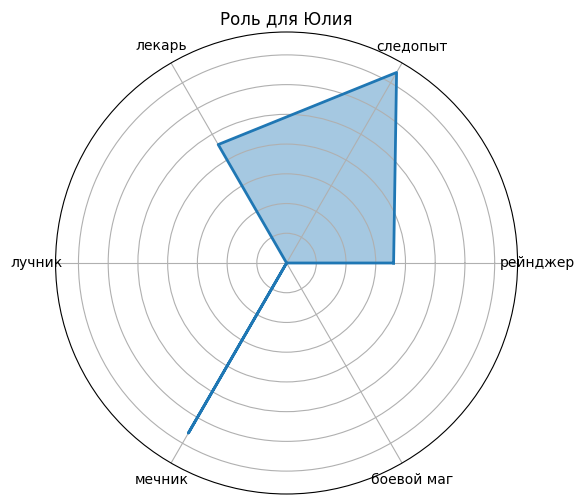

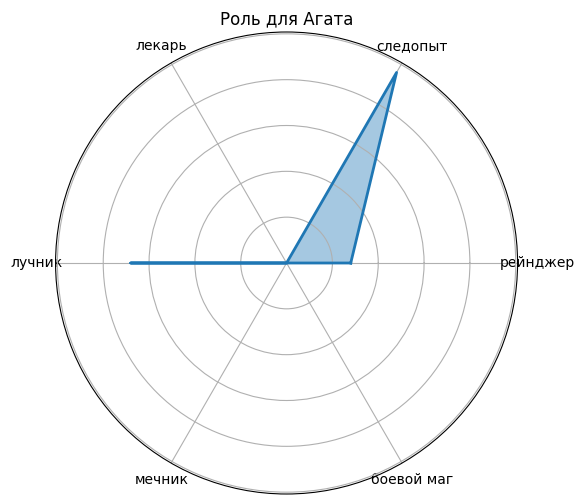

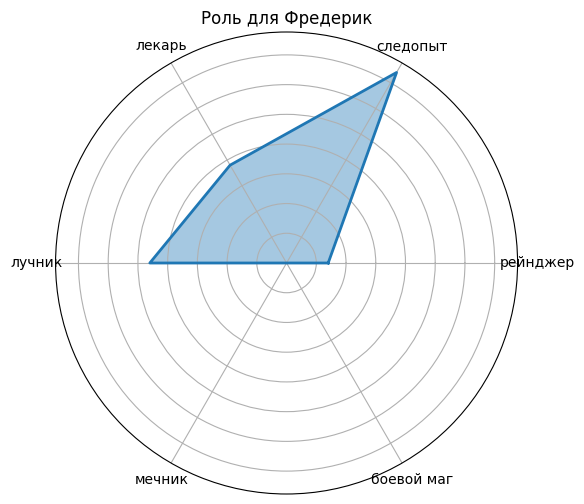

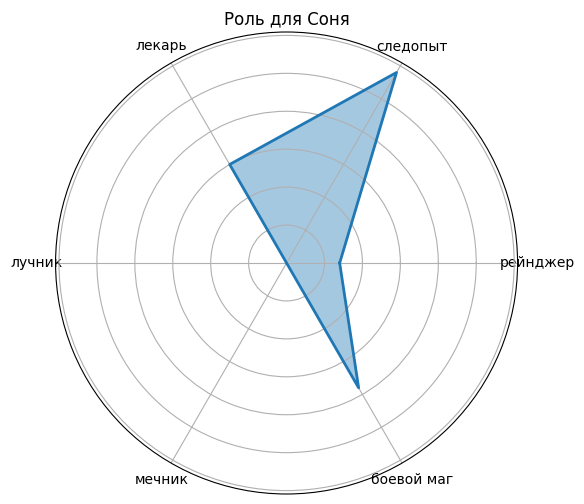

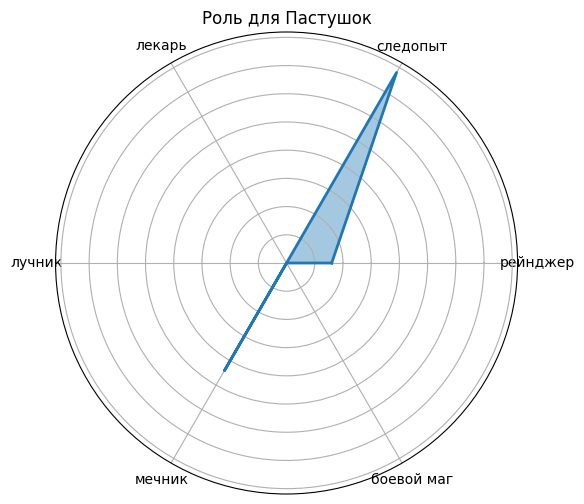

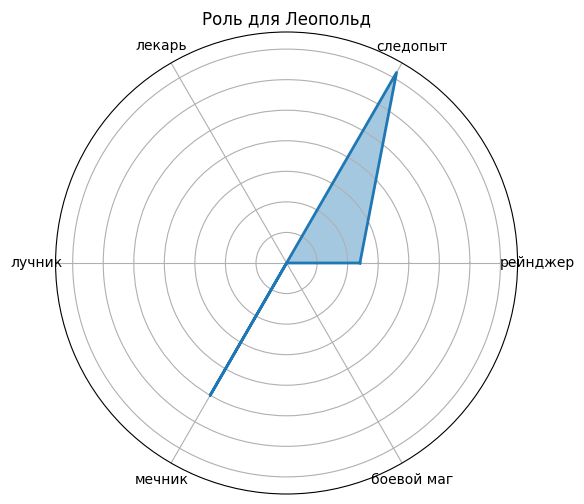

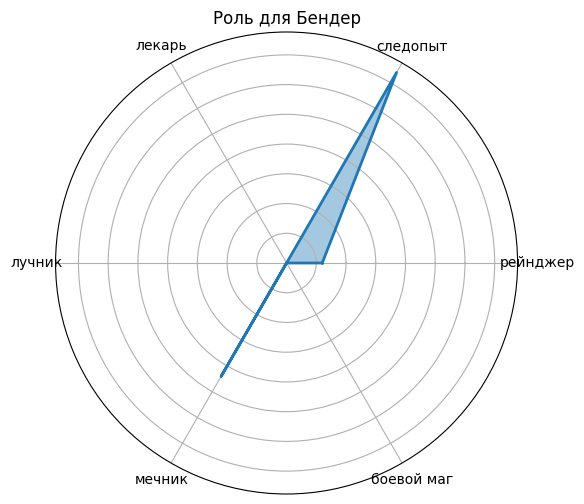

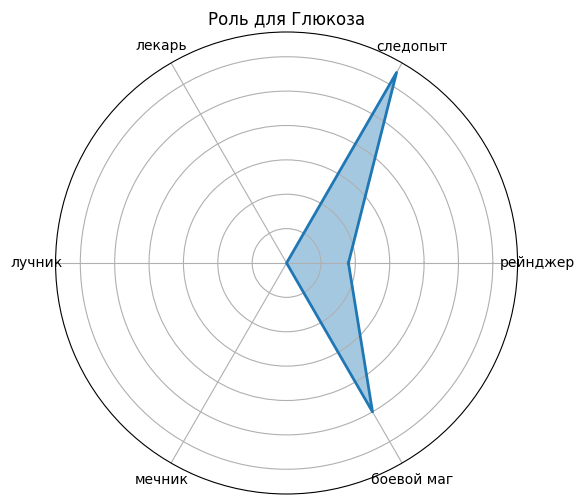

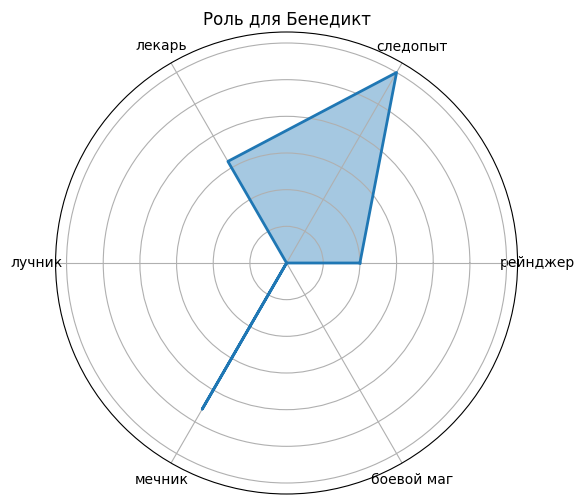

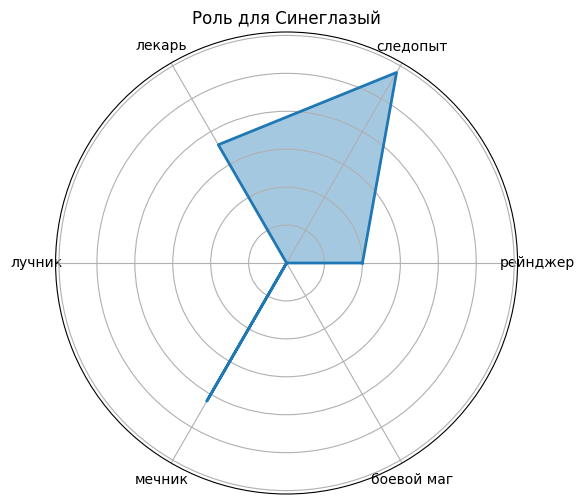

In [67]:
# Радарная диаграмма для ролей каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = diaries['Роль'].unique()

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[diaries['Герой'] == hero]['Роль'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Роль для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_radar(hero)


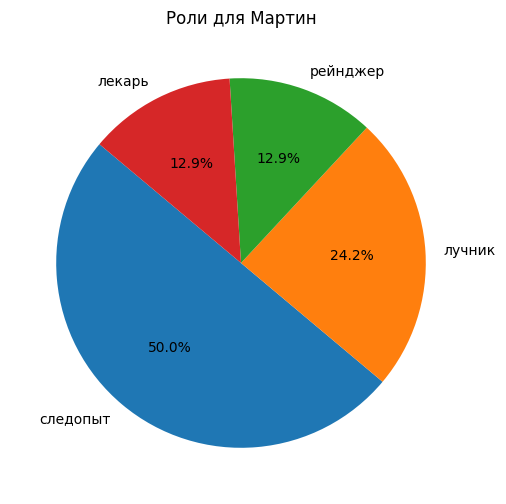

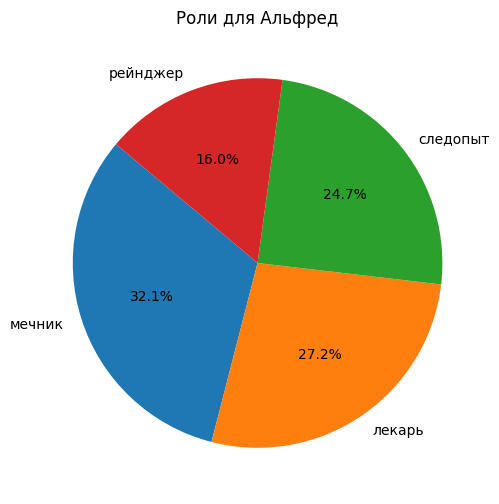

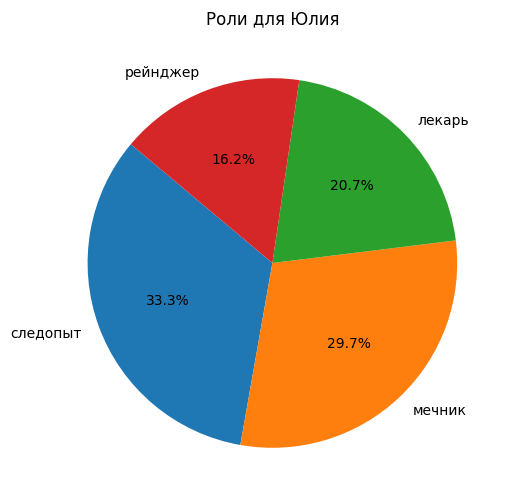

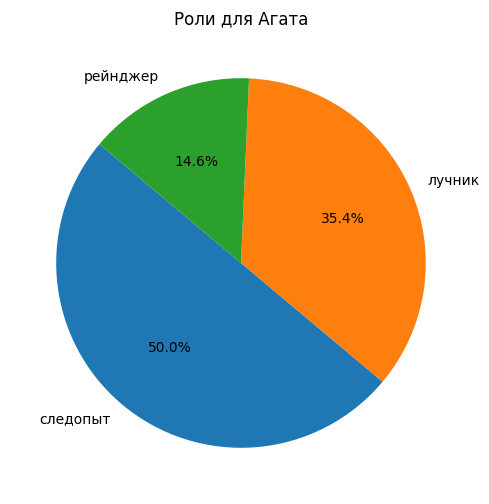

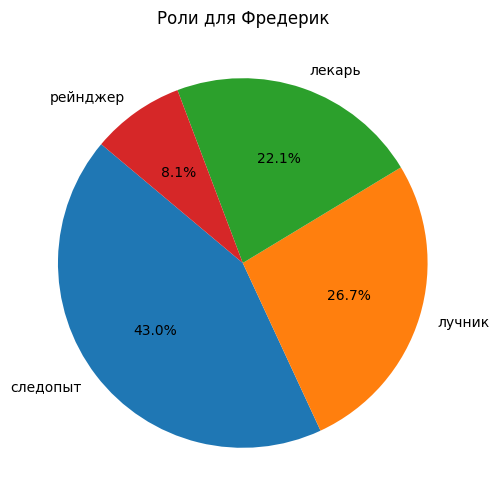

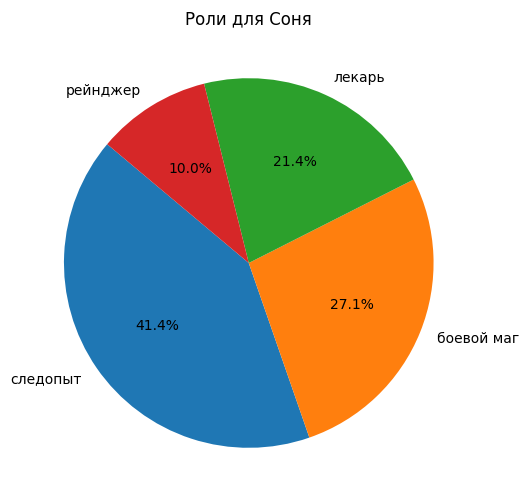

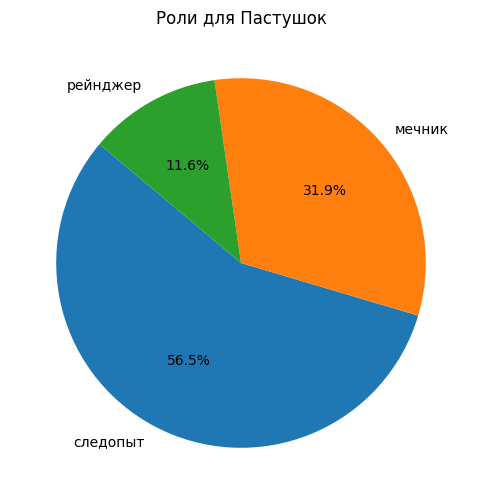

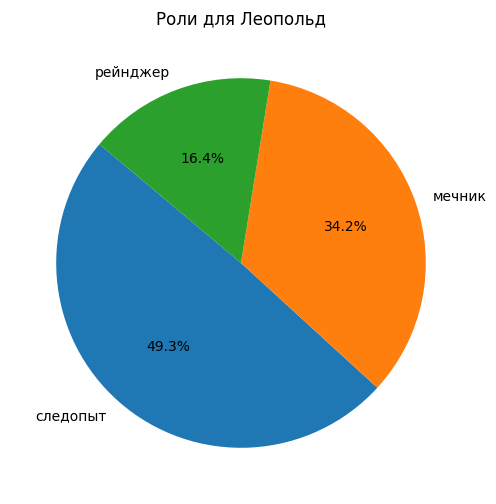

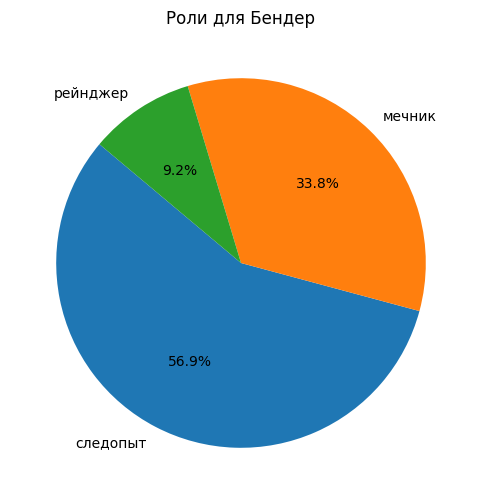

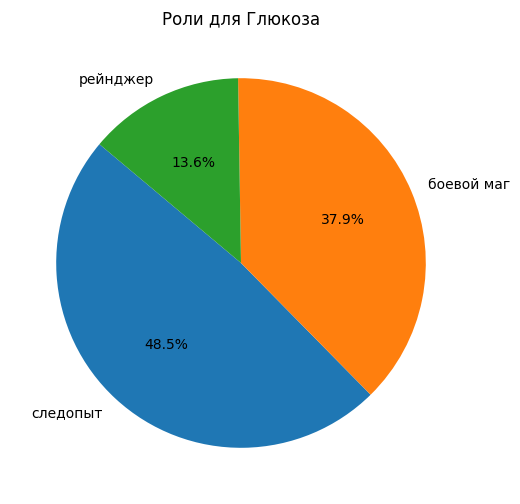

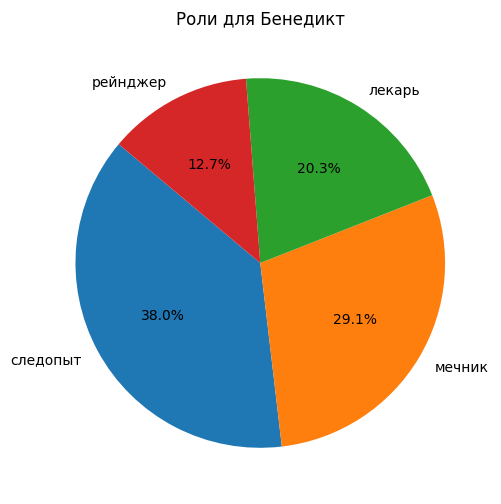

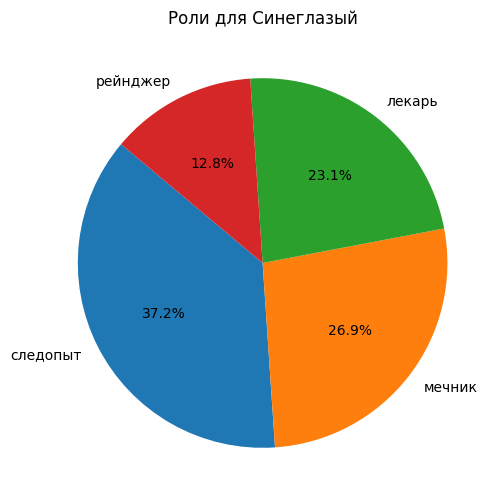

In [ ]:
# Круговая диаграмма для ролей каждого героя
import pandas as pd
import matplotlib.pyplot as plt

# Уникальные герои и роли
heroes = diaries['Герой'].unique()
roles = diaries['Роль'].unique()

# Функция для построения круговой диаграммы для каждого героя
def plot_pie(hero):
    # Подсчитываем частоту ролей для героя
    hero_roles = diaries[diaries['Герой'] == hero]['Роль'].value_counts()
    
    # Построение круговой диаграммы
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(hero_roles, labels=hero_roles.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Роли для {hero}')

    plt.show()

# Построение диаграммы для каждого героя
for hero in heroes:
    plot_pie(hero)


Что выяснено: 
1. Роли мага, лучника, рейнджера используется только для костра
2. 

### Можно ли выполнять задание (заметку) в разных ролях?

In [81]:
# Группируем данные по номеру поручения и проверяем количество уникальных ролей в каждой группе
roles_per_mission = diaries.groupby('Номер поручения')['Роль'].nunique()

# Отбираем только те поручения, где есть более одной уникальной роли
missions_with_multiple_roles = roles_per_mission[roles_per_mission > 1]

# Выводим результаты
if not missions_with_multiple_roles.empty:
    print("Номера поручений с разными ролями:")
    print(missions_with_multiple_roles)
else:
    print("Для каждого поручения указана только одна роль.")


Номера поручений с разными ролями:
Номер поручения
11000    3
11001    3
11005    2
11006    2
11007    2
        ..
11495    3
11496    3
11497    2
11498    2
11499    2
Name: Роль, Length: 199, dtype: int64


In [14]:
marks.groupby(by='Герой').mean().sort_values(by='Оценка по срокам',ascending=False)

,Номер поручения,Оценка за качество,Оценка по срокам,Оценка за вежливость
Герой,,,,
Фредерик,11224.463415,3.878049,4.000000,3.878049
Соня,11230.944444,3.888889,3.972222,3.833333
Мартин,11243.354839,3.967742,3.935484,3.935484
Глюкоза,11241.931818,3.863636,3.931818,4.000000
Бендер,11268.523810,3.928571,3.928571,3.928571
Бенедикт,11267.619048,3.785714,3.880952,3.928571
Пастушок,11254.285714,4.000000,3.836735,4.000000
Леопольд,11269.680851,3.893617,3.808511,3.872340
Синеглазый,11253.853659,3.878049,3.756098,3.878049


Да, можно. Более того, есть зависимость времени от роли для определённой задачи

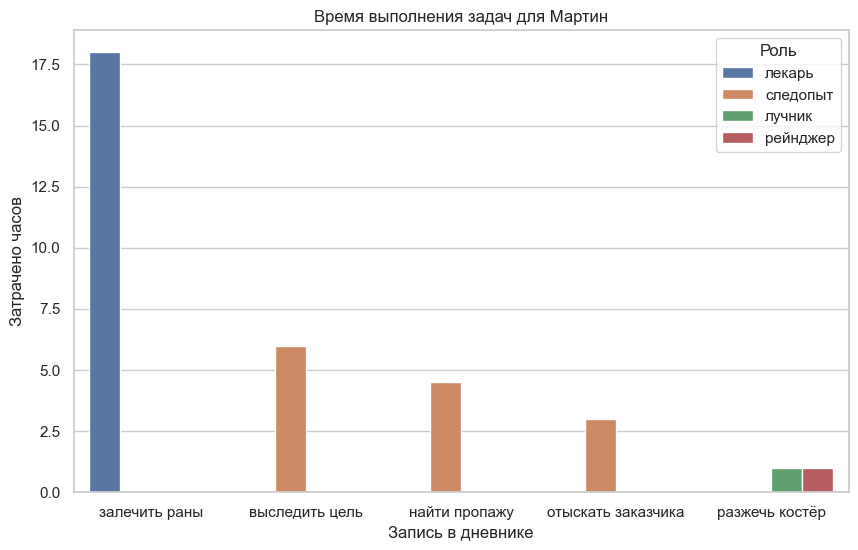

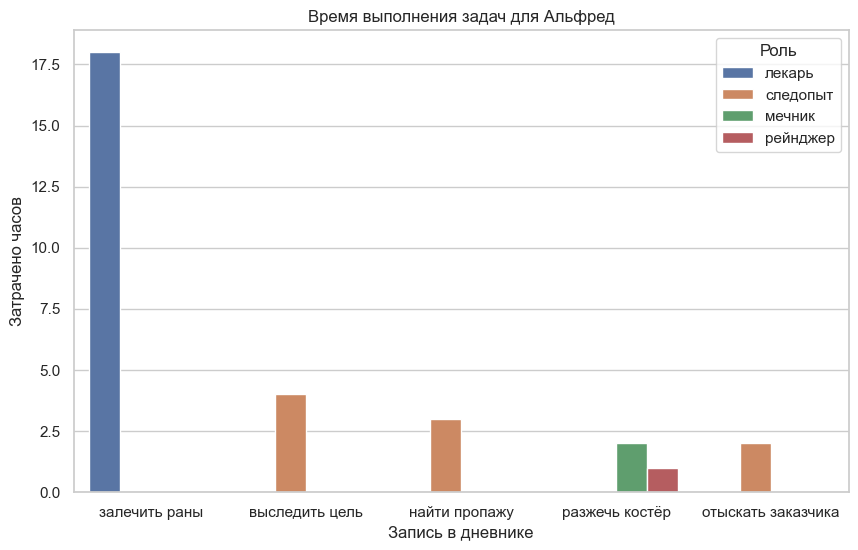

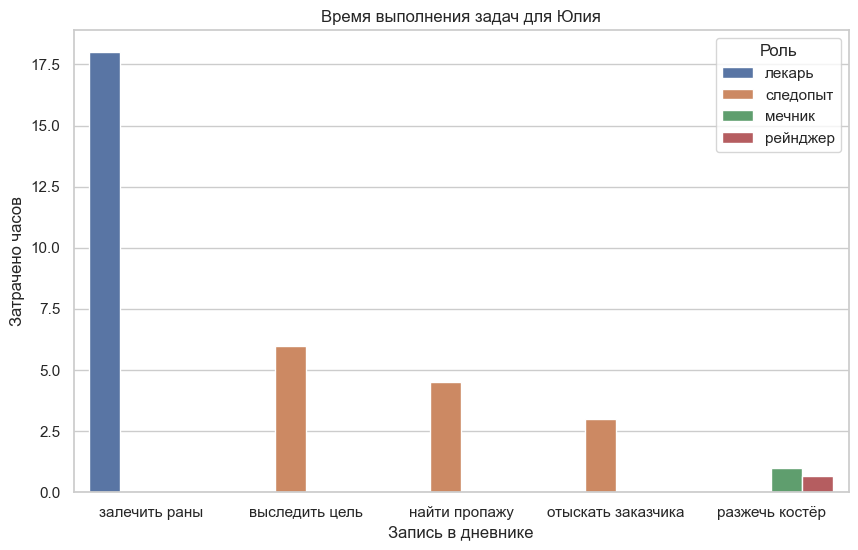

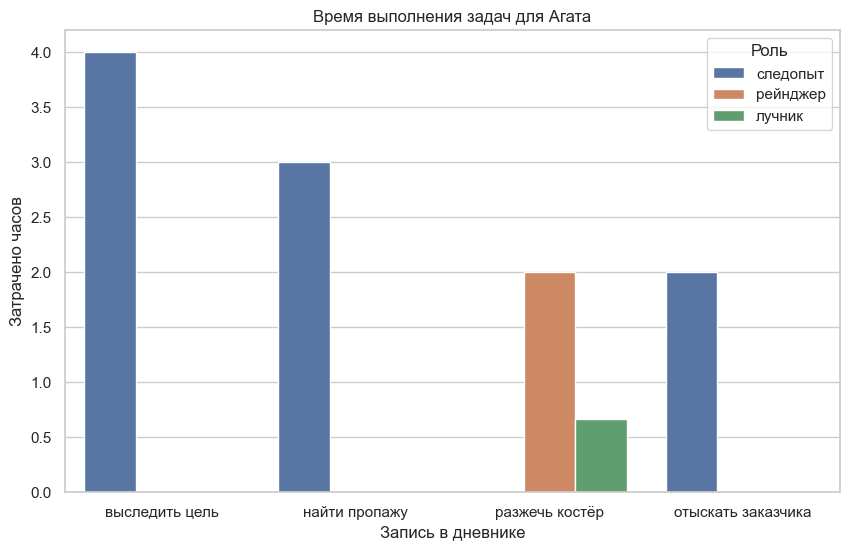

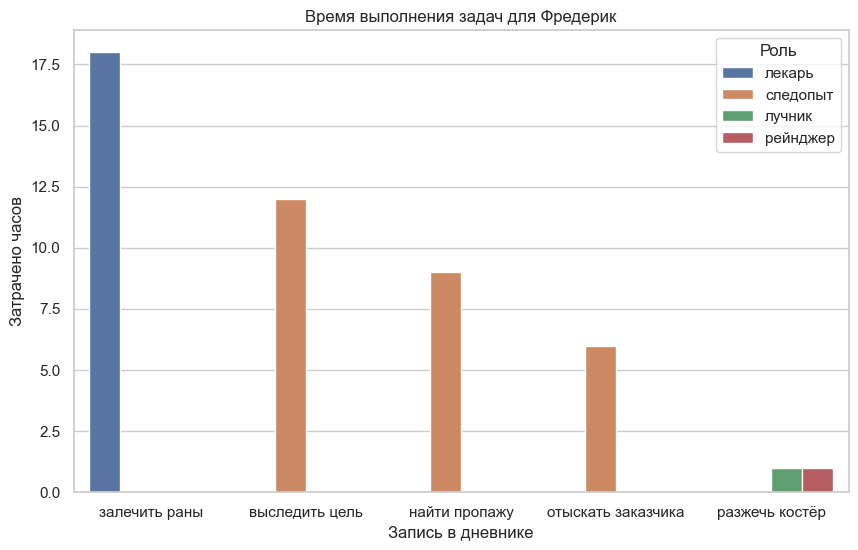

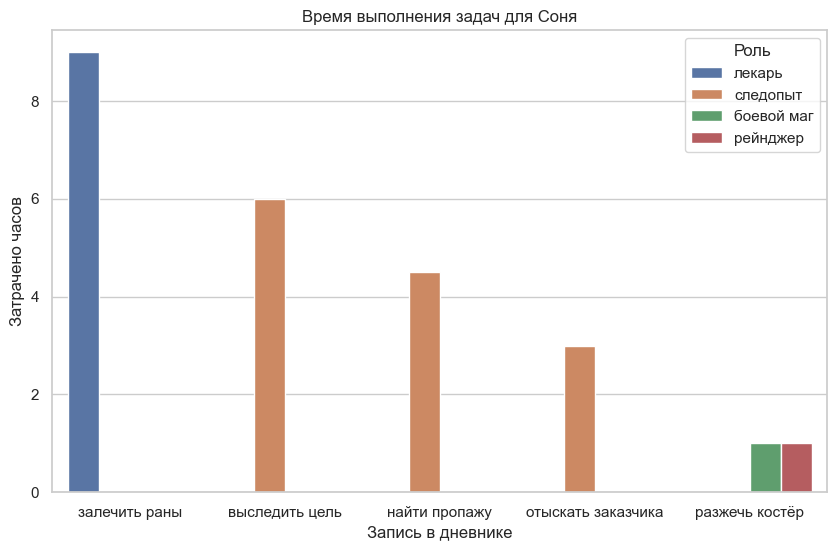

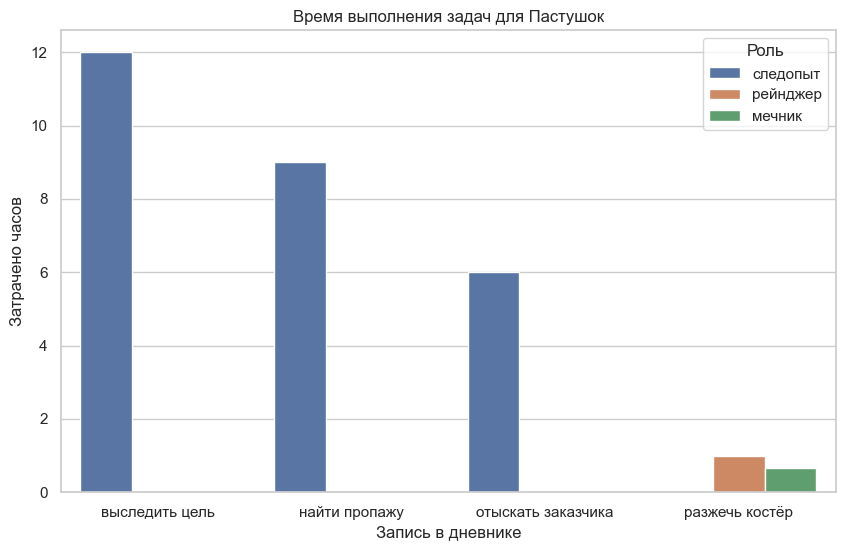

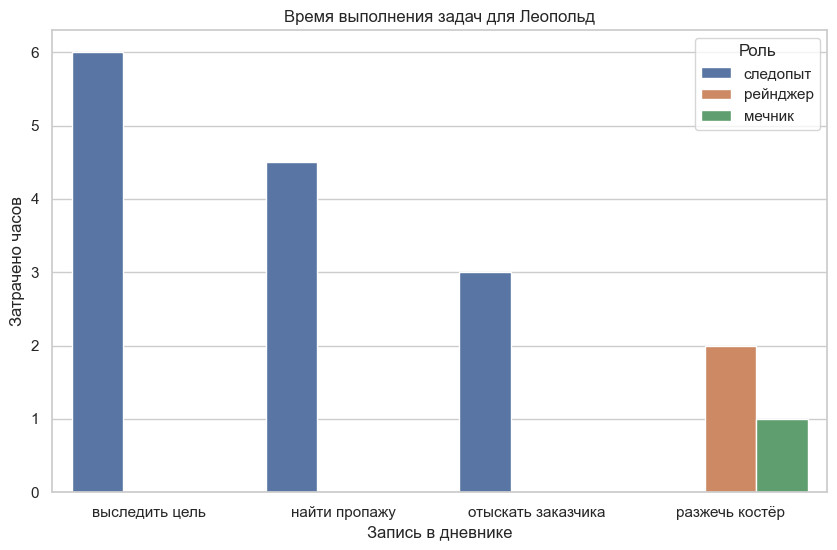

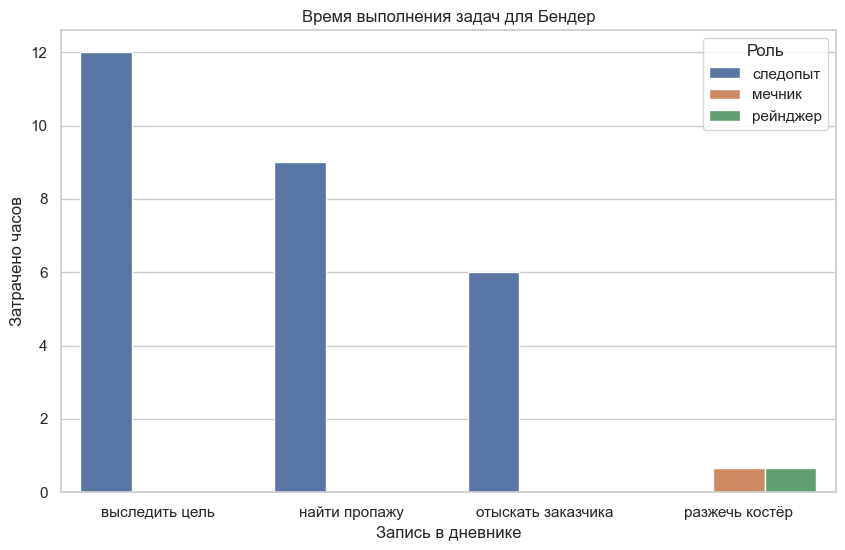

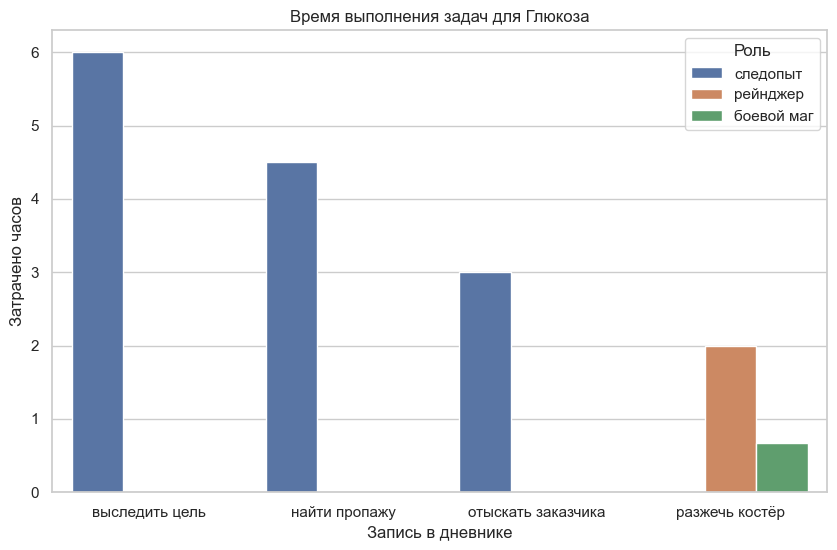

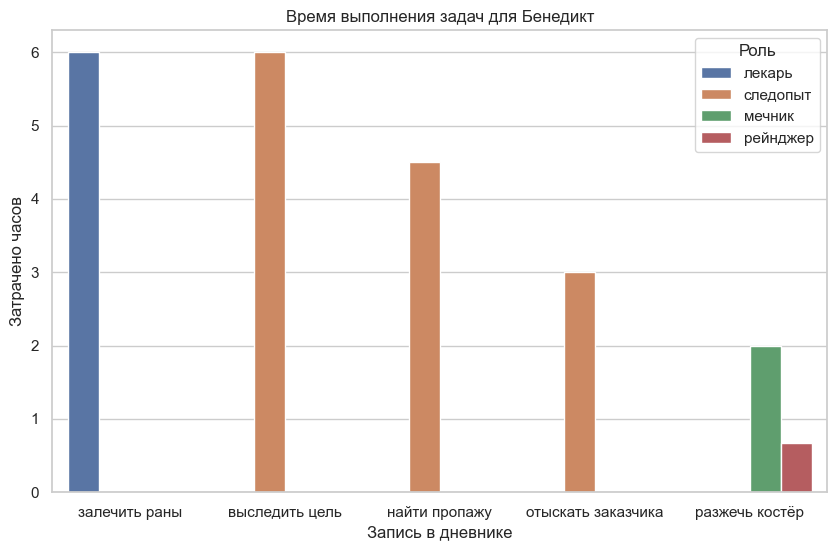

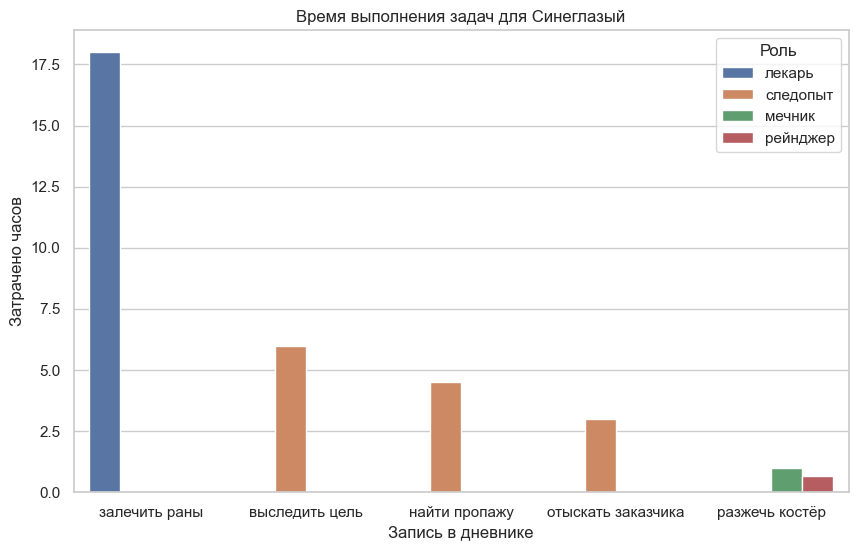

In [ ]:
# Столбчатый график зависимости времени выполнения от роли
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля для более красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы для каждого героя с сортировкой
heroes = diaries['Герой'].unique()
for hero in heroes:
    # Сортируем датафрейм по затраченному времени в порядке убывания
    hero_data = diaries[diaries['Герой'] == hero].sort_values(by='Затрачено часов', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Запись в дневнике', 
        y='Затрачено часов', 
        hue='Роль', 
        data=hero_data
    )
    plt.title(f'Время выполнения задач для {hero}')
    plt.xlabel('Запись в дневнике')
    plt.ylabel('Затрачено часов')
    plt.legend(title='Роль')
    plt.show()


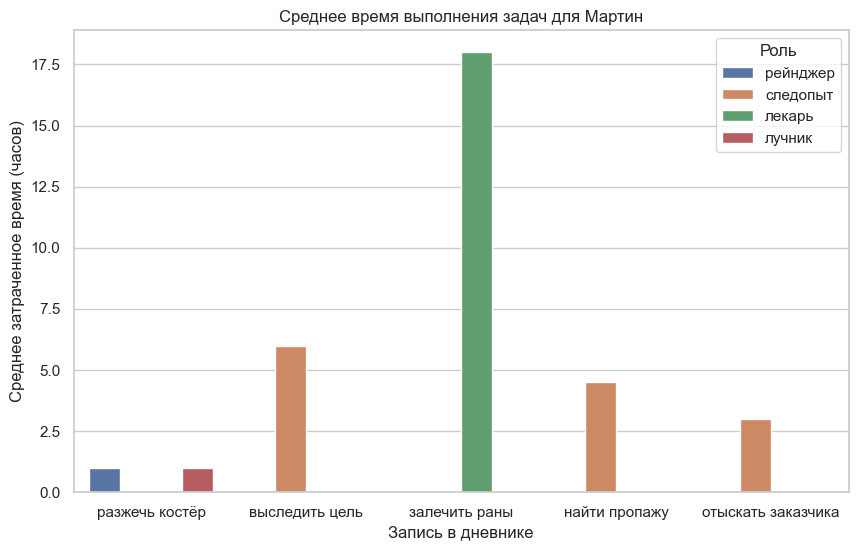

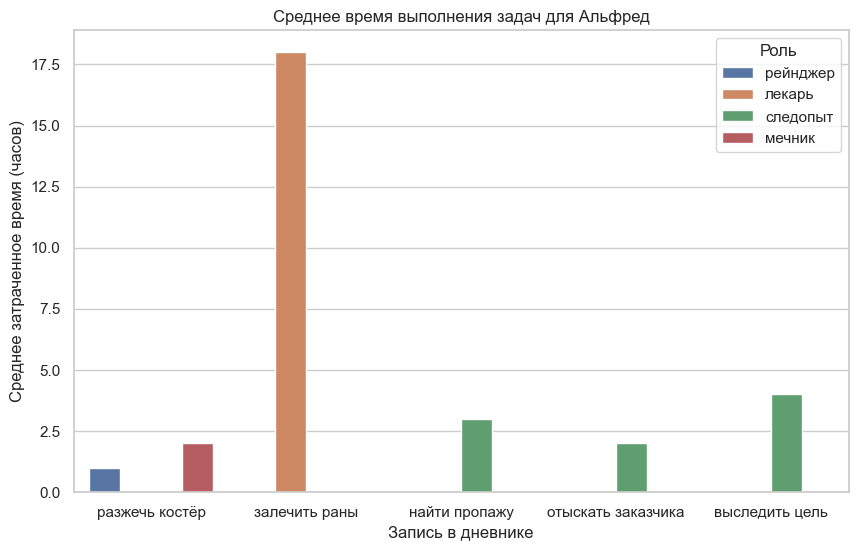

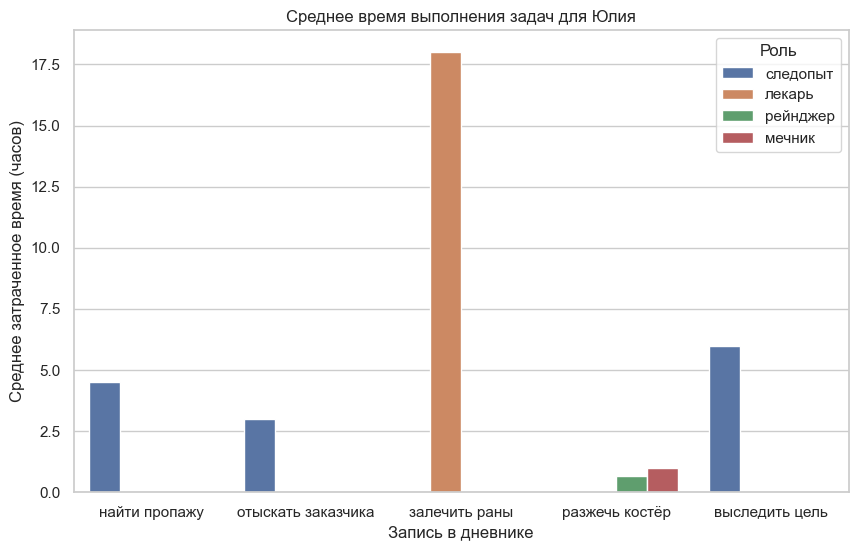

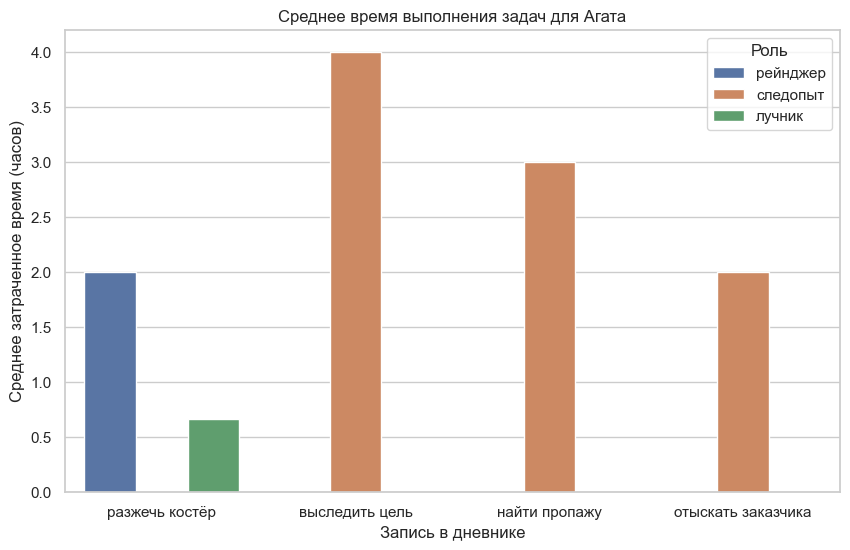

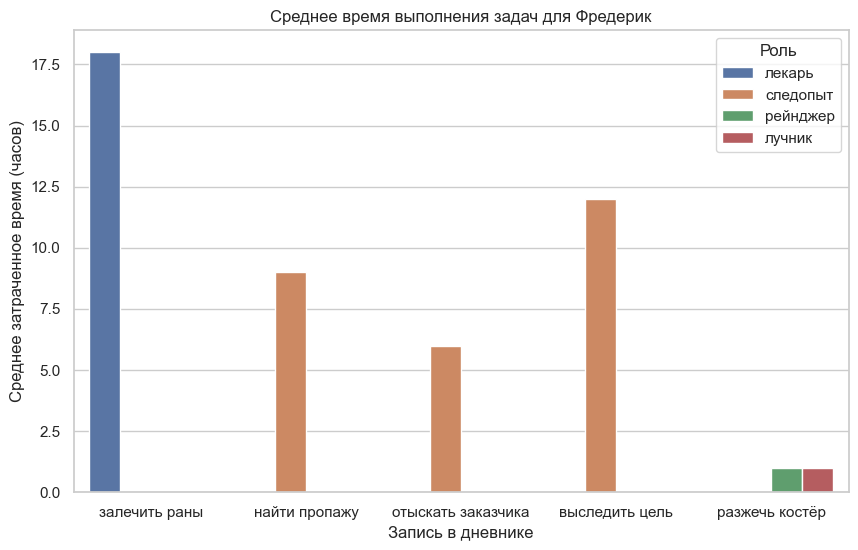

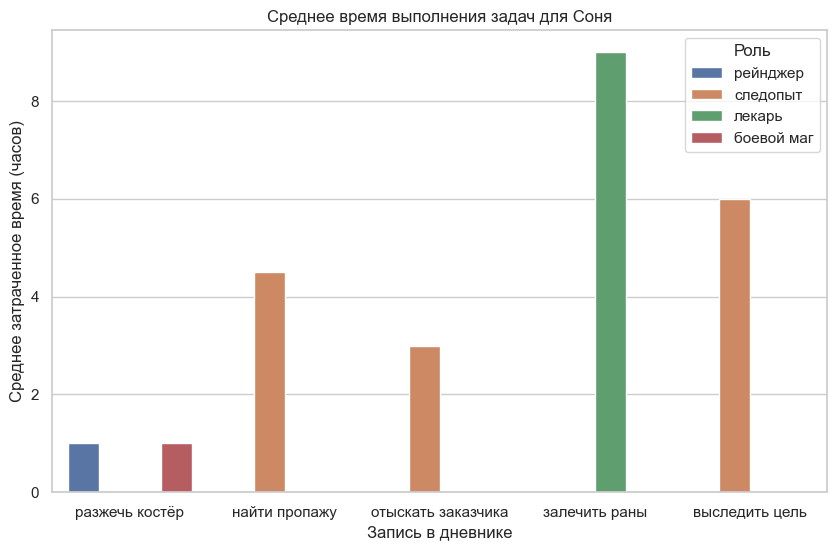

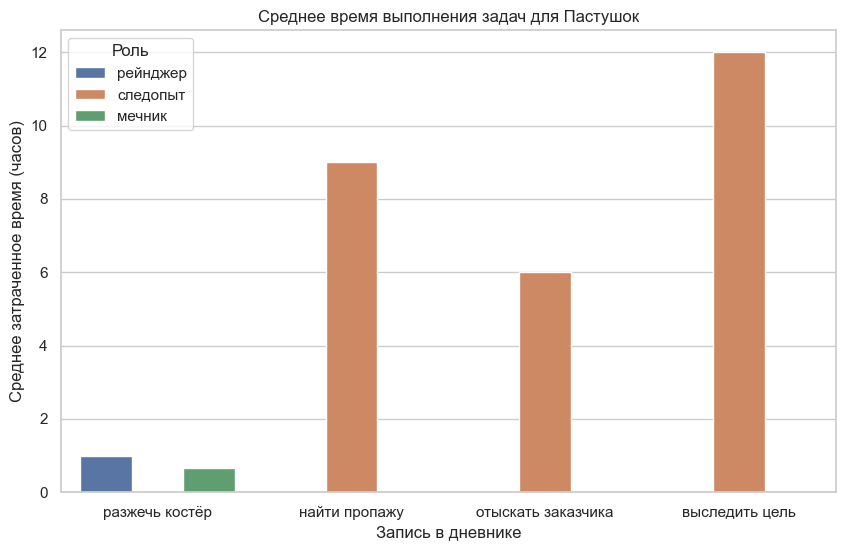

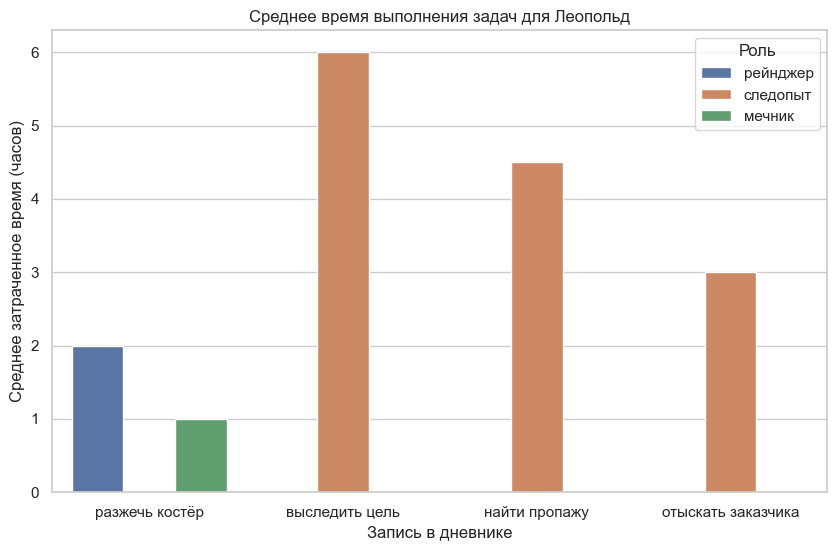

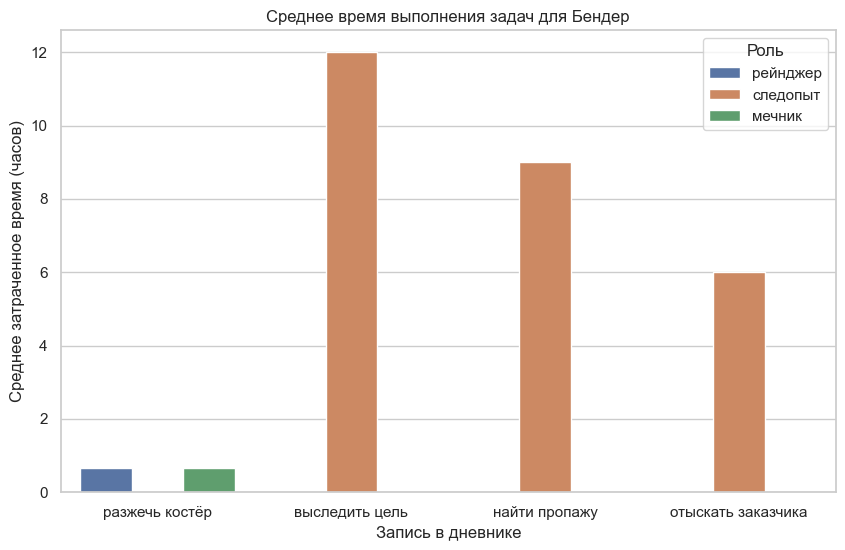

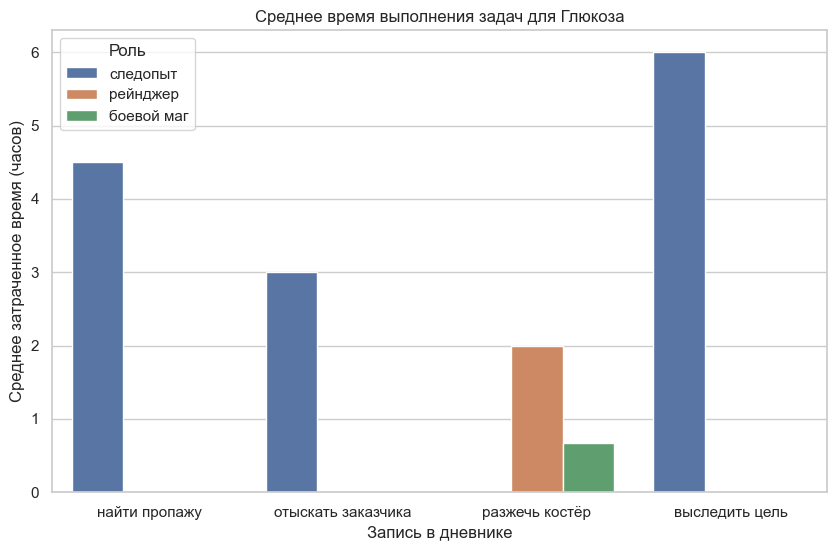

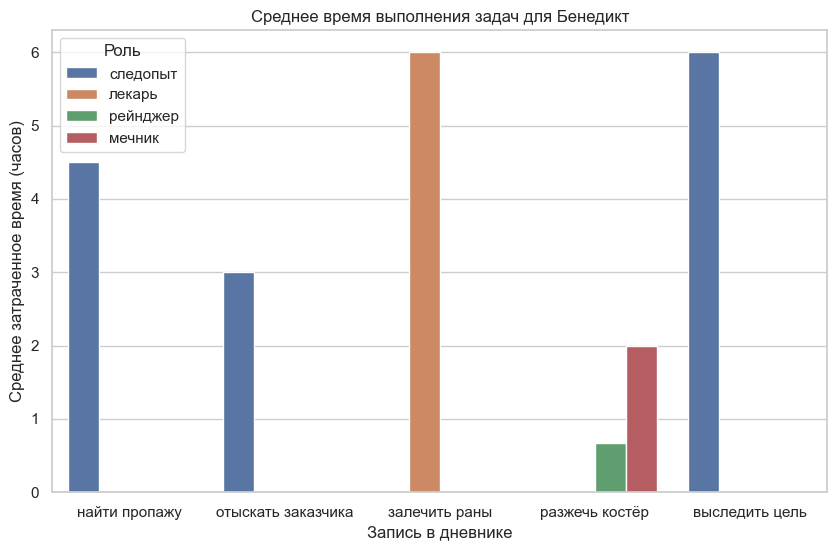

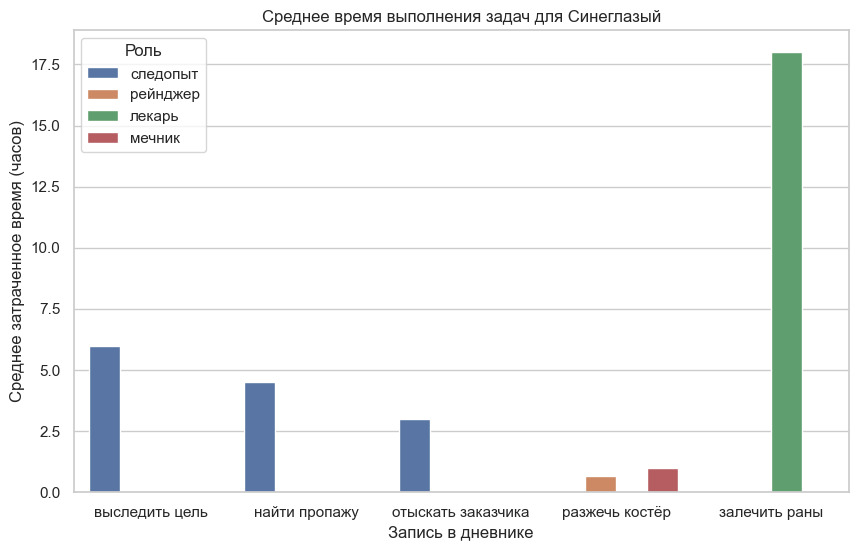

In [ ]:
# Такой же график, но немного другой
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля для более красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы для каждого героя с расчётом среднего времени
heroes = diaries['Герой'].unique()
for hero in heroes:
    plt.figure(figsize=(10, 6))
    
    # Построение графика с расчётом среднего времени для каждого действия и роли
    sns.barplot(
        x='Запись в дневнике', 
        y='Затрачено часов', 
        hue='Роль', 
        data=diaries[diaries['Герой'] == hero],
        estimator=np.mean
    )
    
    plt.title(f'Среднее время выполнения задач для {hero}')
    plt.xlabel('Запись в дневнике')
    plt.ylabel('Среднее затраченное время (часов)')
    plt.legend(title='Роль')
    plt.show()


Разные роли есть только для разжигания костра. Это не целевое действие, но оно тоже занимает время. У кого-то быстрее в роли мечника, у кого-то в роли рейнджера. Нужно это учитывать при оптимизации времени.

Можно создать абсолютный показатель, который отдаёт приоритет той роли, при которой время на выполнение меньше

### Работа с Marks 

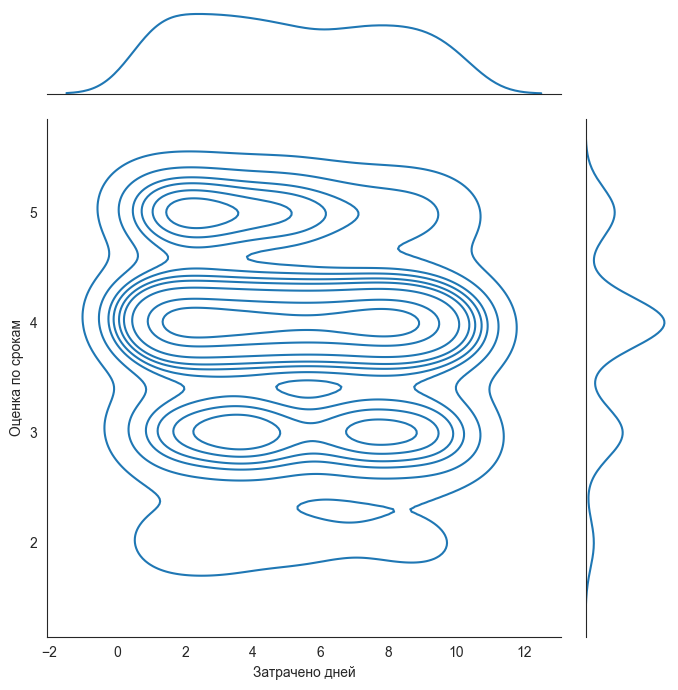

In [ ]:
# Визуализация зависимости времени выполнения и оценки за срок
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
# Объединяем датафреймы по столбцу 'Номер поручения'
merged_df = pd.merge(marks, cases, on="Номер поручения")

# Настраиваем стиль
sns.set_style("white")

# Создаем jointplot
sns.jointplot(
    x="Затрачено дней",
    y="Оценка по срокам",
    data=merged_df,
    kind="kde",
    height=7,
    space=0.3
)

# Показываем график
plt.show()



In [116]:
# Рассчитываем корреляцию между столбцами 'Оценка по срокам' и 'Затрачено дней'
correlation = merged_df["Оценка по срокам"].corr(merged_df["Затрачено дней"])

print("Корреляция между 'Оценка по срокам' и 'Затрачено дней':", correlation)


Корреляция между 'Оценка по срокам' и 'Затрачено дней': -0.08684759040671543


In [86]:
marks.groupby('Герой').mean().sort_values(by='Оценка по срокам',ascending=False)

,Номер поручения,Оценка за качество,Оценка по срокам,Оценка за вежливость
Герой,,,,
Фредерик,11224.463415,3.878049,4.000000,3.878049
Соня,11230.944444,3.888889,3.972222,3.833333
Мартин,11243.354839,3.967742,3.935484,3.935484
Глюкоза,11241.931818,3.863636,3.931818,4.000000
Бендер,11268.523810,3.928571,3.928571,3.928571
Бенедикт,11267.619048,3.785714,3.880952,3.928571
Пастушок,11254.285714,4.000000,3.836735,4.000000
Леопольд,11269.680851,3.893617,3.808511,3.872340
Синеглазый,11253.853659,3.878049,3.756098,3.878049


In [3]:
Heroes = marks.drop(columns='Номер поручения').groupby(by='Герой').mean()
Heroes['Навык лекаря'] = 1/(diaries[diaries["Запись в дневнике"] == "залечить раны"].groupby("Герой")["Затрачено часов"].mean())


In [4]:
Heroes

,Оценка за качество,Оценка по срокам,Оценка за вежливость,Навык лекаря
Герой,,,,
Агата,3.939394,3.727273,4.000000,NaN
Альфред,3.871795,3.692308,3.897436,0.055556
Бендер,3.928571,3.928571,3.928571,NaN
Бенедикт,3.785714,3.880952,3.928571,0.166667
Глюкоза,3.863636,3.931818,4.000000,NaN
Леопольд,3.893617,3.808511,3.872340,NaN
Мартин,3.967742,3.935484,3.935484,0.055556
Пастушок,4.000000,3.836735,4.000000,NaN
Синеглазый,3.878049,3.756098,3.878049,0.055556


In [80]:
diaries[diaries["Роль"] == "следопыт"].groupby("Герой")["Затрачено часов"].mean()

Герой
Агата         2.875000
Альфред       3.100000
Бендер        8.351351
Бенедикт      4.200000
Глюкоза       4.312500
Леопольд      4.250000
Мартин        3.967742
Пастушок      8.538462
Синеглазый    4.293103
Соня          4.293103
Фредерик      8.108108
Юлия          4.418919
Name: Затрачено часов, dtype: float64

In [103]:
diaries[diaries['Номер поручения']==11000]


,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.0,рейнджер
1,11000,Мартин,выследить цель,6.0,следопыт
617,11000,Мартин,разжечь костёр,1.0,лучник


In [6]:
cases['Описание'][0]

'В лесу по дороге от пещеры звери нападают на людей. Нужно убить их. Осмотрите все возможные укрытия, чтобы найти зверей.'

In [8]:
diaries

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.000000,рейнджер
1,11000,Мартин,выследить цель,6.000000,следопыт
2,11001,Альфред,разжечь костёр,1.000000,рейнджер
3,11001,Альфред,залечить раны,18.000000,лекарь
4,11002,Мартин,выследить цель,6.000000,следопыт
...,...,...,...,...,...
883,11487,Глюкоза,разжечь костёр,0.666667,боевой маг
884,11488,Альфред,разжечь костёр,2.000000,мечник
885,11493,Бенедикт,разжечь костёр,2.000000,мечник
886,11498,Мартин,разжечь костёр,1.000000,лучник


### NLP для обучения определения задач

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from natasha import Doc, Segmenter, NewsMorphTagger, NewsEmbedding, MorphVocab
import nltk
from nltk.corpus import stopwords

# Загрузка русских стоп-слов
nltk.download('stopwords')
stop_words = stopwords.words('russian')

# Настройка для лемматизации с помощью Natasha
segmenter = Segmenter()
morph_tagger = NewsMorphTagger(NewsEmbedding())
morph_vocab = MorphVocab()

def lemmatize_text_natasha(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    return ' '.join([token.lemma for token in doc.tokens])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Создаём новый датафрейм с успешными задачами
successful_cases = cases[cases['Выполнено'] == 'да'].copy()

# Объединяем cases и diaries по ключу 'Номер поручения'
merged_df = pd.merge(successful_cases, diaries, on='Номер поручения', how='inner')
merged_df = merged_df.drop_duplicates(subset=['Номер поручения', 'Запись в дневнике'])


In [35]:
# Присваиваем каждой уникальной задаче числовую метку для многоклассовой классификации
le = LabelEncoder()
merged_df['Задача_метка'] = le.fit_transform(merged_df['Запись в дневнике'])

# Группируем по 'Номер поручения' и преобразуем метки задач в список
tasks_by_case = merged_df.groupby('Номер поручения')['Задача_метка'].apply(list)
successful_cases['Задачи_метки'] = successful_cases['Номер поручения'].map(tasks_by_case)

# Удаляем записи без задач
successful_cases = successful_cases.dropna(subset=['Задачи_метки'])


In [36]:
# Применение лемматизации к столбцу 'Описание'
successful_cases['Лемматизированное_описание'] = successful_cases['Описание'].fillna('').apply(lemmatize_text_natasha)


In [37]:
# Преобразуем текстовые данные в числовое представление с учетом русских стоп-слов
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
X = vectorizer.fit_transform(successful_cases['Лемматизированное_описание'])

# Преобразуем задачи в многометочные метки
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(successful_cases['Задачи_метки'])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Обернем LogisticRegression в OneVsRestClassifier для поддержки многометочных меток
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Прогнозируем и оцениваем модель
y_pred = model.predict(X_test)

# Преобразуем метки в строки для корректного отображения
target_names = [str(label) for label in mlb.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.54      0.56      0.55        27
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        60

   micro avg       0.92      0.91      0.91       157
   macro avg       0.91      0.88      0.89       157
weighted avg       0.92      0.91      0.91       157
 samples avg       0.93      0.93      0.91       157



In [39]:
# Отбираем наблюдения, которые ещё не выполнены
uncompleted_cases = cases[cases['Выполнено'] != 'да'].copy()

# Применяем лемматизацию к столбцу 'Описание'
uncompleted_cases['Лемматизированное_описание'] = uncompleted_cases['Описание'].fillna('').apply(lemmatize_text_natasha)

# Преобразуем текст в числовое представление с использованием обученного ранее TF-IDF векторизатора
X_uncompleted = vectorizer.transform(uncompleted_cases['Лемматизированное_описание'])

# Используем обученную модель для предсказания задач
y_pred_uncompleted = model.predict(X_uncompleted)

# Преобразуем предсказания обратно в текстовые метки задач
predicted_tasks = mlb.inverse_transform(y_pred_uncompleted)

# Добавляем предсказанные задачи в датафрейм
uncompleted_cases['Предсказанные_задачи'] = predicted_tasks

# Выводим результат
print(uncompleted_cases[['Описание', 'Предсказанные_задачи']])


                                              Описание Предсказанные_задачи
56   По дороге из деревни у меня пропала драгоценно...               (2, 3)
134  В пещере появвилось огромное каменное чудовище...                 (4,)
143  В пещере завёлся дракон. Нужно его убить. Это ...               (1, 4)
161  В городе у меня потерялся рюкзак. Нужно найти ...               (2, 3)
218  Недалеко от города монстры похитили путников. ...                 (0,)
232  В деревне монстры похитили путников. Нужно спа...                 (0,)
234  В лесу по дороге от пещеры заметили разбойнико...                 (4,)
285  В городе у меня потерялся рюкзак. Нужно найти ...               (2, 3)
306  В деревне монстры похитили путников. Нужно спа...                 (0,)
310  По дороге из деревни монстры похитили путников...                 (0,)
311  По дороге из деревни у меня была украдена драг...               (2, 3)
381  В пещере появвилось огромное каменное чудовище...               (1, 4)
387  Недалек

In [41]:
# Преобразуем предсказания обратно в текстовые метки задач
predicted_tasks_text = [
    [le.inverse_transform([task_code])[0] for task_code in task_codes]
    for task_codes in predicted_tasks
]

# Добавляем текстовые метки задач в датафрейм как список строк
uncompleted_cases['Предсказанные_задачи_текст'] = predicted_tasks_text

# Выводим результат
uncompleted_cases[['Описание', 'Предсказанные_задачи_текст']]


,Описание,Предсказанные_задачи_текст
56,По дороге из деревни у меня пропала драгоценно...,"[найти пропажу, отыскать заказчика]"
134,В пещере появвилось огромное каменное чудовище...,[разжечь костёр]
143,В пещере завёлся дракон. Нужно его убить. Это ...,"[залечить раны, разжечь костёр]"
161,В городе у меня потерялся рюкзак. Нужно найти ...,"[найти пропажу, отыскать заказчика]"
218,Недалеко от города монстры похитили путников. ...,[выследить цель]
232,В деревне монстры похитили путников. Нужно спа...,[выследить цель]
234,В лесу по дороге от пещеры заметили разбойнико...,[разжечь костёр]
285,В городе у меня потерялся рюкзак. Нужно найти ...,"[найти пропажу, отыскать заказчика]"
306,В деревне монстры похитили путников. Нужно спа...,[выследить цель]
310,По дороге из деревни монстры похитили путников...,[выследить цель]


#### Подготовка текста